<a href="https://colab.research.google.com/github/hany606/PAI_Fall21IU/blob/main/HanyHamed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Computer Vision - Fall 2021**

# Midterm Exam ( Practical Test )

# 13.09.2021

## submit before 12:40

**Submit a copy of this file including your solution with results in a ipynb file (your_name.ipynb)**



#### Setup and importing the libraries

In [1]:
# Install and setup the environment:

from IPython.display import clear_output
!pip install opencv-python==3.4.2.17
!pip install opencv-contrib-python==3.4.2.17
# clear_output()

     |████████████████████████████████| 25.0 MB 93 kB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 30.6 MB 26 kB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [2]:
# all plots will be set directly below the code cell that produced it
%matplotlib inline
from matplotlib import pyplot as plt
from IPython.display import clear_output
# set inline plots size
plt.rcParams["figure.figsize"] = (16, 10) # (w, h)
# remove grid lines
import numpy as np
import time
import cv2
import math
from copy import deepcopy

#### Helper functions:

In [3]:
# function to read and resize an image
def read_and_resize(filename, grayscale = False, fx= 0.5, fy=0.5):
    if grayscale:
      img_result = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    else:
      imgbgr = cv2.imread(filename, cv2.IMREAD_COLOR)
      # convert to rgb
      img_result = cv2.cvtColor(imgbgr, cv2.COLOR_BGR2RGB)
    # resize
    img_result = cv2.resize(img_result, None, fx=fx, fy=fy, interpolation = cv2.INTER_CUBIC)
    return img_result

    
# Show the images in row
def show_in_row(list_of_images, titles = None, disable_ticks = False):
  count = len(list_of_images)
  for idx in range(count):
    subplot = plt.subplot(1, count, idx+1)
    if titles is not None:
      subplot.set_title(titles[idx])
      
    img = list_of_images[idx]
    cmap = 'gray' if (len(img.shape) == 2 or img.shape[2] == 1) else None
    subplot.imshow(img, cmap=cmap)
    if disable_ticks:
      plt.xticks([]), plt.yticks([])
  plt.show()
  
# Show the images in columns
def show_in_column(list_of_images, titles = None, disable_ticks = False):
  count = len(list_of_images)
  for idx in range(count):
    subplot = plt.subplot(count, 1, idx+1)
    if titles is not None:
      subplot.set_title(titles[idx])
      
    img = list_of_images[idx]
    cmap = 'gray' if (len(img.shape) == 2 or img.shape[2] == 1) else None
    subplot.imshow(img, cmap=cmap)
    if disable_ticks:
      plt.xticks([]), plt.yticks([])
  plt.show()

def processSIFT(img):
  sift = cv2.xfeatures2d.SIFT_create()
  return sift.detectAndCompute(img, None)


### **Task 1 (40%)** 

Detect the object shown in Fig. 1 within the scene in Fig. 2. using SIFT

Display the good matching key points

Crop the detected object out of the source image

Results for each step should be printed, comments on the codes are required



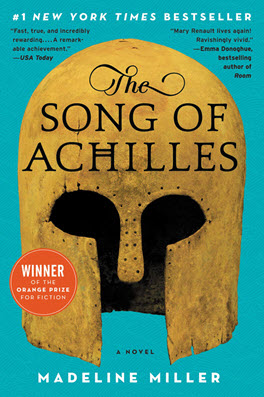

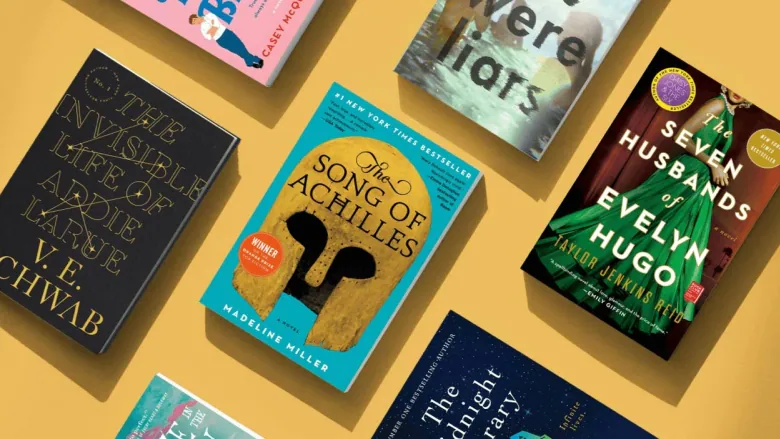

In [4]:
# Download the image
!wget https://www.dropbox.com/s/b3o5yomqvzteipe/Copy%20of%20Copy%20of%2081msb6gUBTL.jpg?dl=0 -O book.jpg
!wget https://www.dropbox.com/s/2uqbajma9nnb490/indigo-booktok.webp?dl=0 -O scene.jpg

clear_output()

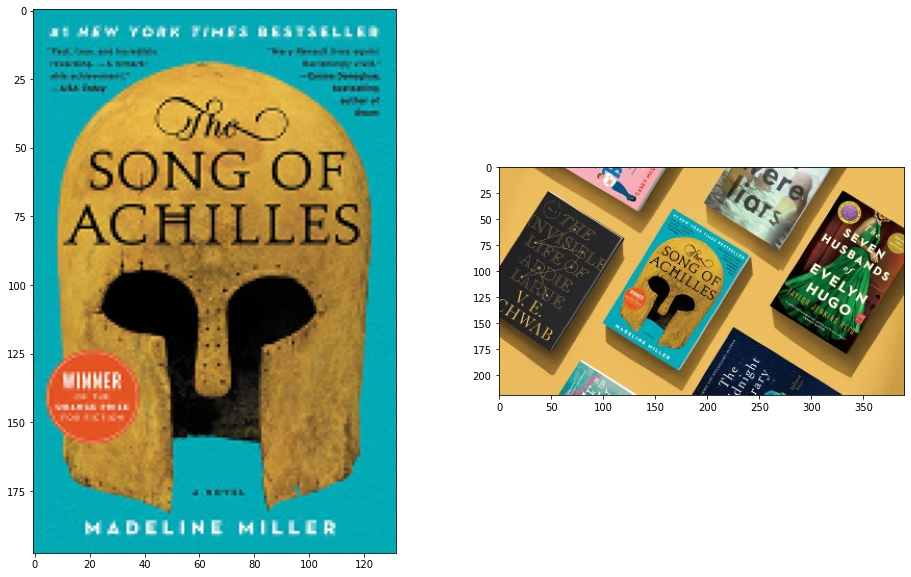

In [5]:
# Load and display images (5%)

# Load and resize to the half just not to have unnecessary more computation with larger sizes

book = read_and_resize("book.jpg")
scene = read_and_resize("scene.jpg")
show_in_row([book, scene])

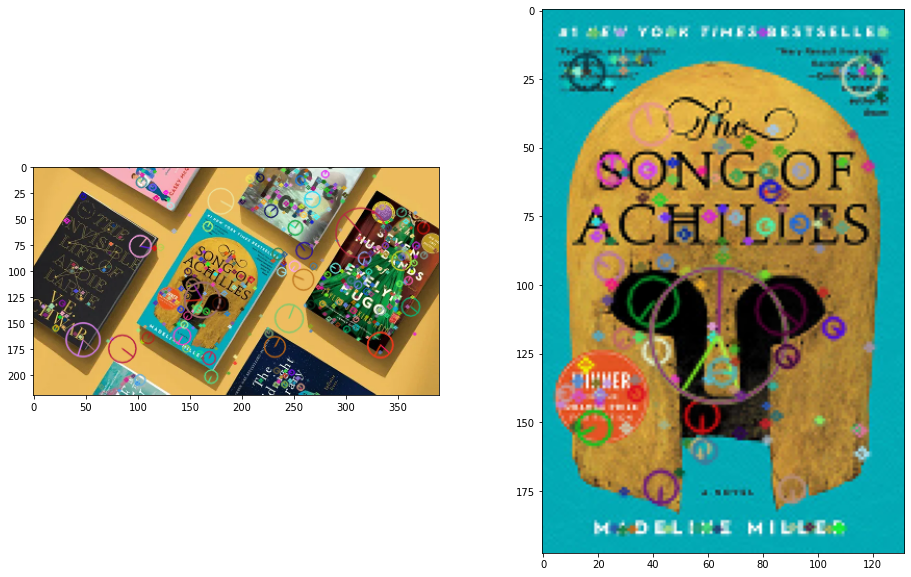

In [6]:
# write yor code for object detection (10%)

# processSIFT is defined in the helper function
kp_scene, descriptors_scene = processSIFT(scene)  # Detect the keypoints using SIFT
scene_desc = cv2.drawKeypoints(scene, kp_scene, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) # Draw keypoints for the scene

# Repeat the same for the book
kp_book, descriptors_book = processSIFT(book)
book_desc = cv2.drawKeypoints(book, kp_book, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# book_desc = cv2.drawKeypoints(book, kp_book[34:35], None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

show_in_row([scene_desc, book_desc])

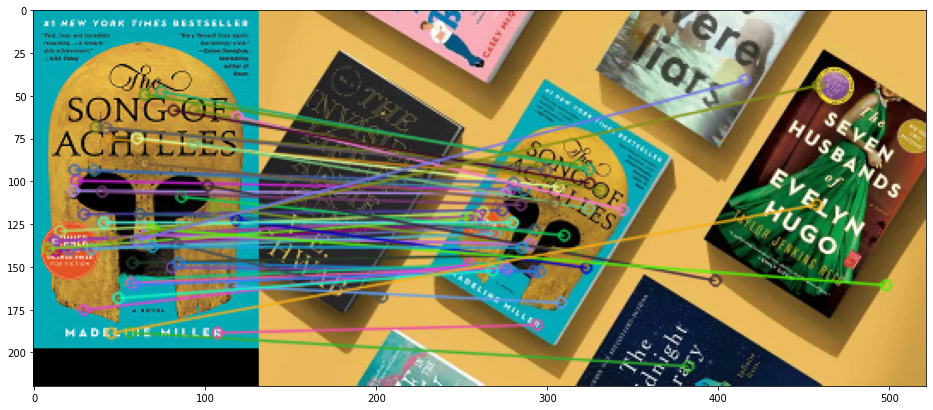

In [7]:
# display good matching (10%)
# Source: https://docs.opencv.org/3.4/d3/da1/classcv_1_1BFMatcher.html, https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_matcher/py_matcher.html
# Using this function which is basically is brute force matcher or the same as in the lab
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)  # Bruteforce matcher

matches = bf.match(descriptors_book, descriptors_scene) # query, train
matches = sorted(matches, key = lambda x:x.distance)

top_matches_num = 50

matching_img = cv2.drawMatches(book, kp_book, scene, kp_scene, matches[:top_matches_num], scene, flags=2)

# print(help(matches[1]))
# print(help(kp_book[matches[1].queryIdx]))
# print((kp_book[matches[1].queryIdx]).pt)
# print(matches[1].queryIdx, matches[100].trainIdx)
show_in_row([matching_img])

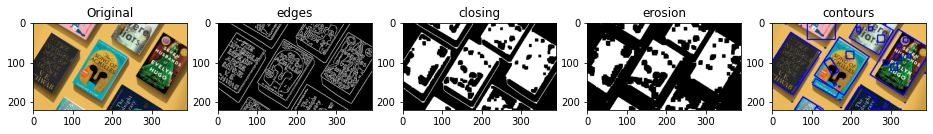

[[182 182]
 [107 132]
 [170  35]
 [246  85]]
35 182


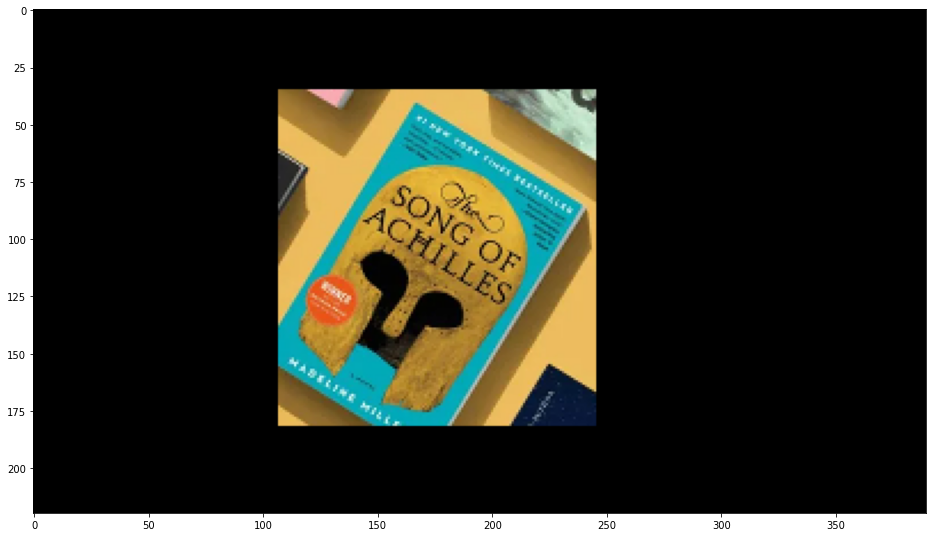

In [8]:
# crop out (remove) the detected object from the scene (15%)
# The book in scene is there and the bg is black


img_list = [scene]
img_list_labels = ["Original"]

# Get all the points in the matches from the training img
train_img_key_point_xy = []
for m in matches[:top_matches_num]:
  train_img_key_point_xy.append(kp_scene[m.trainIdx].pt)


# print(train_img_key_point_xy)

# Make Canny edge detection
edges = cv2.Canny(scene,100,200)
img_list.append(edges)
img_list_labels.append("edges")

closing = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, np.ones((7,7),np.uint8))
img_list.append(closing)
img_list_labels.append("closing")

erosion = cv2.erode(closing, np.ones((3,3),np.uint8),iterations = 1)
img_list.append(erosion)
img_list_labels.append("erosion")

# Get all the contours
img_contours, contours, hierarchy = cv2.findContours(erosion, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


img_contours = deepcopy(scene)

results = []
idx_results = []

for i,cnt in enumerate(contours): # Avoid the outer contours of the image
  rect = cv2.minAreaRect(cnt)
  box = cv2.boxPoints(rect)
  box = np.int0(box)
  cv2.drawContours(img_contours,[box],0,(0,0,255),2)
  result = 0
  # Check how many keypoints in each and select the most one that has
  for pt in train_img_key_point_xy:
    if (cv2.pointPolygonTest(cnt, pt, True) > 0):  # if the top point of the bounding box is inside another box then do not consider it as an object, it might be the internal of an object
      result += 1
  results.append(result)
  idx_results.append(box)

img_list.append(img_contours)
img_list_labels.append("contours")

show_in_row(img_list, img_list_labels)

crop_img = np.zeros(shape=scene.shape, dtype=scene.dtype)
crop_box = idx_results[np.argmax(results)]
print(crop_box)
top_left_y = crop_box[2][1]
bot_right_y = crop_box[0][1]
top_left_x = crop_box[1][0]
bot_right_x = crop_box[3][0]
print(top_left_y,bot_right_y)
# crop_img[top_left_y:bot_right_y, top_left_x:bot_right_x, :] = np.array()
crop_img[top_left_y:bot_right_y, top_left_x:bot_right_x, :] = scene[top_left_y:bot_right_y, top_left_x:bot_right_x,:]

show_in_row([crop_img])


### **Task 2 (60%)**

The aim of this task is to extract the plate of the key shown in Fig.3 that has the number, the final result should be similar to Fig. 4.

DO NOT use template matching or any detection method.

**Results for each step should be printed, comments on the codes are required**


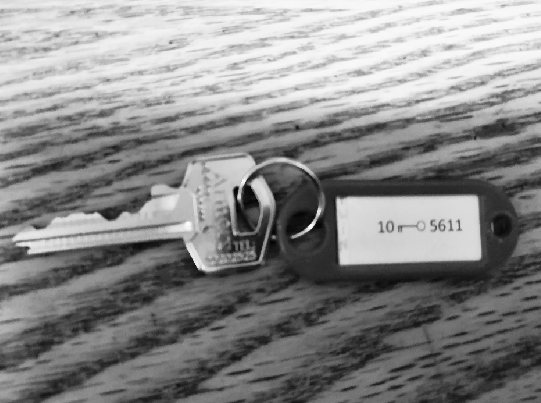


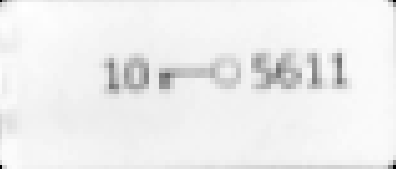







In [9]:
# Download the image
!wget https://www.dropbox.com/s/evoml3c3xlh7633/key.jpg?dl=0 -O keys.jpg
clear_output()

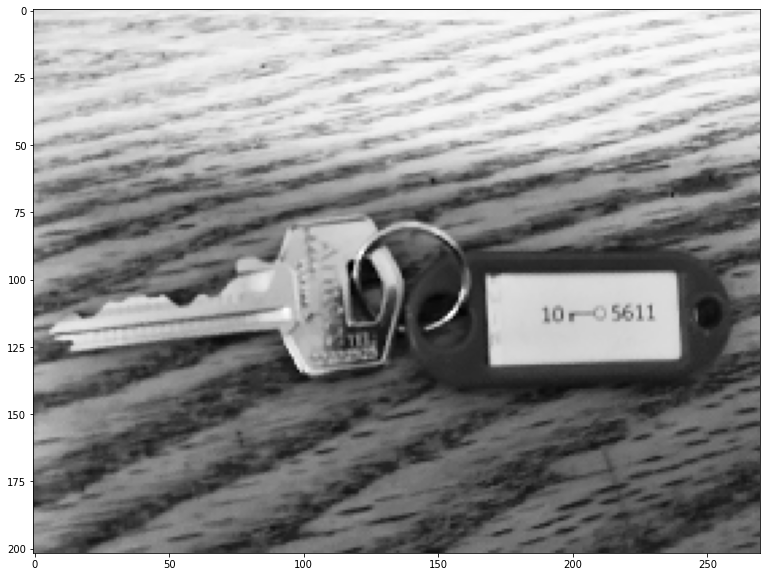

In [10]:
# Load and display the image (5%)

keys = read_and_resize("keys.jpg")

show_in_row([keys])

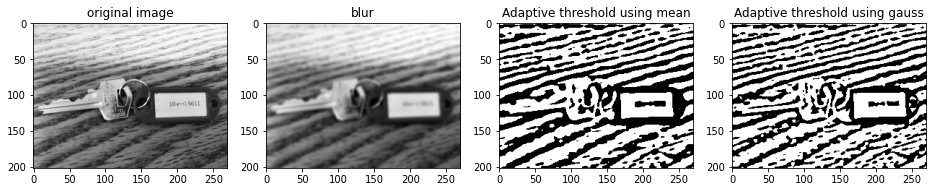

In [11]:
# Apply adaptive thresholding, using slider, and adjust the threshold value to get the best output (15%)
#@title Parameters { run: "auto" }
block_size = 19 #@param {type:"slider", min:1, max:55, step:2}
c_value = 3 #@param {type:"slider", min:-20, max:20, step:1}

keys_grey = cv2.cvtColor(keys, cv2.COLOR_RGB2GRAY)
keys_blur = cv2.GaussianBlur(keys_grey, (7,7), 0)

th_mean = cv2.adaptiveThreshold(keys_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,block_size,c_value)
th_gauss = cv2.adaptiveThreshold(keys_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,block_size,c_value)
 
titles = ['original image', 'blur', 'Adaptive threshold using mean', 'Adaptive threshold using gauss']
images = [keys_grey, keys_blur, th_mean, th_gauss]
show_in_row(images, titles)

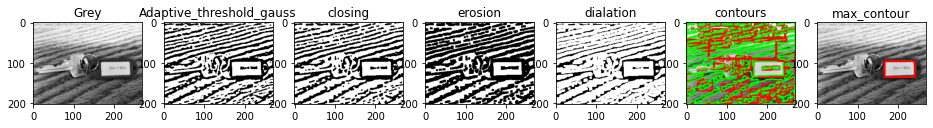

In [12]:
# For the binary image resulted from the thresholding, obtain the contours of the objects.
img_list = [keys_grey, th_gauss]
img_list_labels = ["Grey", "Adaptive_threshold_gauss"]
# Morphological Transformations
closing = cv2.morphologyEx(th_gauss, cv2.MORPH_CLOSE, np.ones((3,3),np.uint8))
img_list.append(closing)
img_list_labels.append("closing")

erosion = cv2.erode(closing, np.ones((3,3),np.uint8),iterations = 1)
img_list.append(erosion)
img_list_labels.append("erosion")


dialation = cv2.dilate(erosion, np.ones((3,3),np.uint8),iterations = 2)
img_list.append(dialation)
img_list_labels.append("dialation")


# Find contours
img_contours, contours, hierarchy = cv2.findContours(dialation, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


img_contours = deepcopy(keys)

# Then, among all contours, consider only the one of the plate. (20%)
# HHint: use CHAIN_APPROX_SIMPLE to extract minimum points that represent the contour.

for i,cnt in enumerate(contours): # Avoid the outer contours of the image
  x, y, w, h = cv2.boundingRect(cnt)
  # if(i > 1):
  #   break
  
  # Draw rectangle and text
  img_contours = cv2.rectangle(img_contours, (x,y), (x+w,y+h), (255,0,0), 3)
  cv2.drawContours(image=img_contours, contours=[cnt], contourIdx=0, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)  # Draw the contour

img_list.append(img_contours)
img_list_labels.append("contours")


img_max_contour = deepcopy(keys)


# c = max(contours, key = cv2.contourArea)
sorting_function = lambda c: cv2.contourArea(c)
contours_sorted = sorted(contours, key=sorting_function, reverse = True)
c = contours_sorted[1]
# c = contours[]
x, y, w, h = cv2.boundingRect(c)
# Draw rectangle and text
img_max_contour = cv2.rectangle(img_max_contour, (x,y), (x+w,y+h), (255,0,0), 3)
cv2.drawContours(image=img_max_contour, contours=c, contourIdx=0, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)  # Draw the contour
img_list.append(img_max_contour)
img_list_labels.append("max_contour")


show_in_row(img_list, img_list_labels)


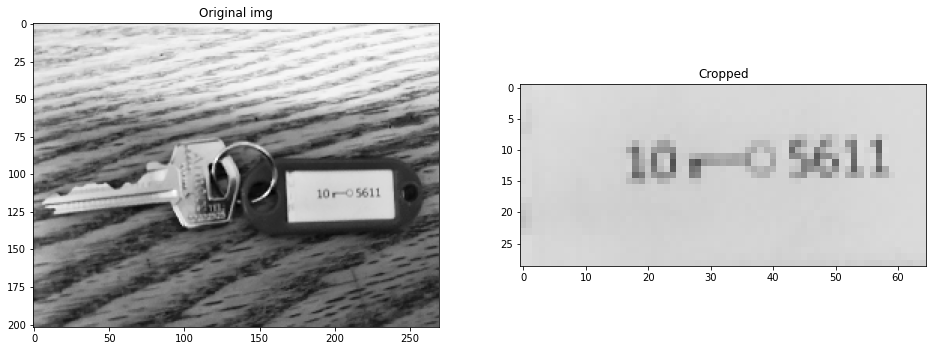

In [13]:
# crop the region of the image that includes the numbers.
# and Do all necessary transformations to get closest imsge to the one in Fig. 4 (20%)
crop_key_num = keys[y+5:y+h-5, x+5:x+w-5]
show_in_row([keys, crop_key_num], ["Original img", "Cropped"])
